In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import bean as be

In [2]:
plt.style.use('default')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 

In [3]:
bdata = be.read_h5ad("../../results/filtered_annotated/LDLRCDS/bean_count_LDLRCDS_annotated_spacer0.1_0.3.h5ad")

In [4]:
bdata.uns.keys()

dict_keys(['allele_counts', 'edit_counts', 'lfc', 'lfc_corr', 'metadata', 'repguide_mask', 'sig_allele_counts', 'sig_allele_counts_spacer', 'sig_allele_counts_spacer_0_19', 'sig_allele_counts_spacer_0_19_A.G', 'sig_allele_counts_spacer_0_19_A.G_translated', 'sig_allele_counts_spacer_0_19_A.G_translated_prop0.1_0.3', 'target_base_change', 'tiling'])

In [8]:
def get_allele_stats(allele_key):
    adf = bdata.uns[allele_key].copy()
    adf['edits'] = adf.aa_allele.map(lambda a: list(a.aa_allele.edits) + list(a.nt_allele.edits))
    edf = adf.explode('edits')
    edf['edit_abs'] = edf.edits.map(lambda e: e.get_abs_edit())
    edf_vars = edf.loc[~edf.guide.map(lambda s: "CONTROL" in s)]
    alleles_per_guide = (adf.groupby('guide')['aa_allele'].count().reindex(bdata.guides.index).fillna(0) + 1)
    guides_per_edit = edf_vars.groupby('edit_abs')['guide'].nunique()
    return alleles_per_guide, guides_per_edit

In [9]:
def plot_hist_int(data, ax = None):
    #https://stackoverflow.com/questions/30112420/histogram-for-discrete-values-with-matplotlib
    d = np.diff(np.unique(data)).min()
    left_of_first_bin = data.min() - float(d)/2
    right_of_last_bin = data.max() + float(d)/2
    if ax is None:
        plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), color='grey')
    else:
        ax.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), color='grey')
        return ax

## Before allele filtering

In [23]:
bdata.uns.keys()

dict_keys(['allele_counts', 'edit_counts', 'lfc', 'lfc_corr', 'metadata', 'repguide_mask', 'sig_allele_counts', 'sig_allele_counts_spacer', 'sig_allele_counts_spacer_0_19', 'sig_allele_counts_spacer_0_19_A.G', 'sig_allele_counts_spacer_0_19_A.G_translated', 'sig_allele_counts_spacer_0_19_A.G_translated_prop0.1_0.3', 'target_base_change', 'tiling'])

In [24]:
alleles_per_guide, guides_per_edit = get_allele_stats('sig_allele_counts_spacer_0_19_A.G_translated')

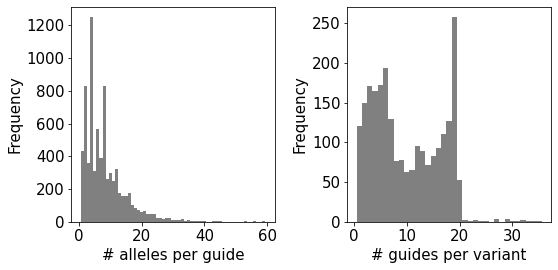

In [25]:
plt.style.use('jr')
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plot_hist_int(alleles_per_guide, ax[0])
plot_hist_int(guides_per_edit, ax[1])
ax[0].set_xlabel("# alleles per guide")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("# guides per variant")
ax[1].set_ylabel("Frequency")
plt.tight_layout()
fig.savefig("S9_allele_filtering_stats_unfiltered.pdf")

In [26]:
alleles_per_guide.quantile([0.0, 0.25,0.5,0.75,1.0])

0.00     1.0
0.25     4.0
0.50     7.0
0.75    11.0
1.00    59.0
Name: aa_allele, dtype: float64

In [27]:
alleles_per_guide.mean()

8.1576

In [28]:
guides_per_edit.quantile([0.0, 0.25,0.5,0.75,1.0])

0.00     1.0
0.25     4.0
0.50     9.0
0.75    16.0
1.00    35.0
Name: guide, dtype: float64

In [29]:
guides_per_edit.mean()

10.024359512809744

## After allele filtering

In [16]:
alleles_per_guide, guides_per_edit = get_allele_stats('sig_allele_counts_spacer_0_19_A.G_translated_prop0.1_0.3')

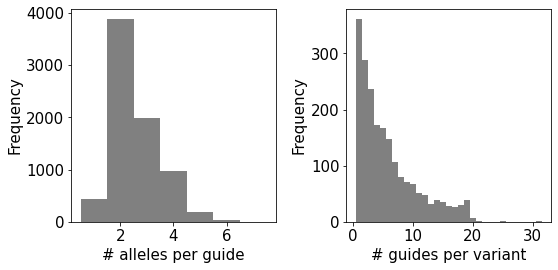

In [17]:
plt.style.use('jr')
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plot_hist_int(alleles_per_guide, ax[0])
plot_hist_int(guides_per_edit, ax[1])
ax[0].set_xlabel("# alleles per guide")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("# guides per variant")
ax[1].set_ylabel("Frequency")
plt.tight_layout()
fig.savefig("S9_allele_filtering_stats.pdf")

In [18]:
alleles_per_guide.quantile([0.0, 0.25,0.5,0.75,1.0])

0.00    1.0
0.25    2.0
0.50    2.0
0.75    3.0
1.00    7.0
Name: aa_allele, dtype: float64

In [19]:
alleles_per_guide.mean()

2.5614666666666666

In [20]:
guides_per_edit.quantile([0.0, 0.25,0.5,0.75,1.0])

0.00     1.0
0.25     2.0
0.50     4.0
0.75     8.0
1.00    31.0
Name: guide, dtype: float64

In [21]:
guides_per_edit.mean()

5.793323514972999